# Simple Linear Regression

### Steps :

#### 1. Reading and Understanding the Data
#### 2. Training the Model
#### 3. Residual Analysis
#### 4. Predicting and Evaluate the Model

In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
# Reading the Data

advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

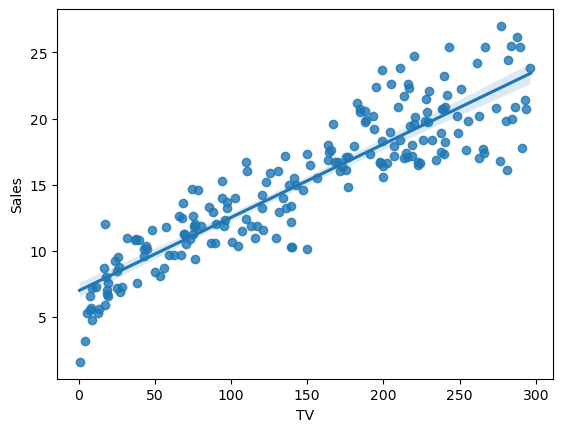

In [7]:
# Visualize the dataset

sns.regplot(x='TV', y='Sales', data=advertising)

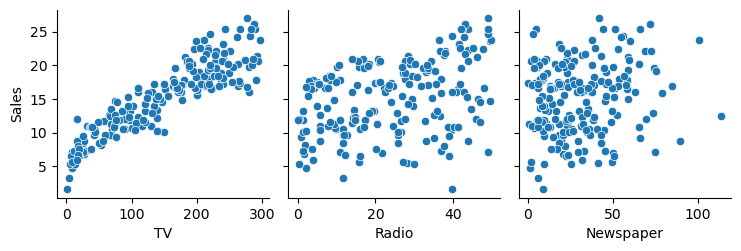

In [8]:
# Using Pairplot

sns.pairplot(data=advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales')

<Axes: >

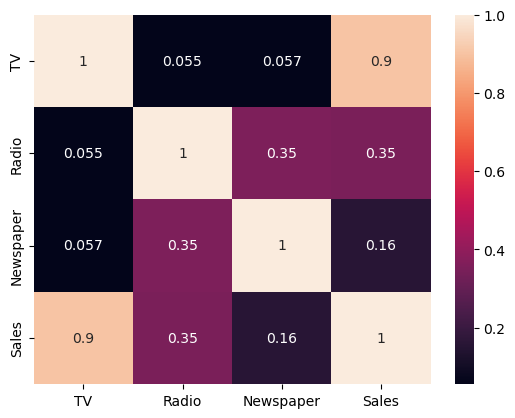

In [9]:
# Heat map

sns.heatmap(advertising.corr() ,annot=True)

# Equation Linear Regression 

### y = c + m1 * TV

#### Steps :

- Create X and y
- Create Test and Train Sets (20-80, 70-30)
- Train your model on the training set
- Evaluate the Model(Training Set, Test Set)

In [12]:
# Creating X and y

X = advertising['TV']
y = advertising['Sales']

In [13]:
# Create Test and Train Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)
y_train.shape

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [14]:
# Training the Model

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [15]:
# y = c + m1.X1
# y = c.const + m1.TV

In [16]:
# Fitting the model

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [17]:
# Sales = 6.94 + 0.05 * TV

In [18]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           1.52e-52
Time:                        20:12:15   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# 1. Coeff and P-value
# 2. R-squred is 81.6% which is vey high
# 3. p(F-statistic) is low <=> the fit is not by chance

In [20]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
dtype: float64

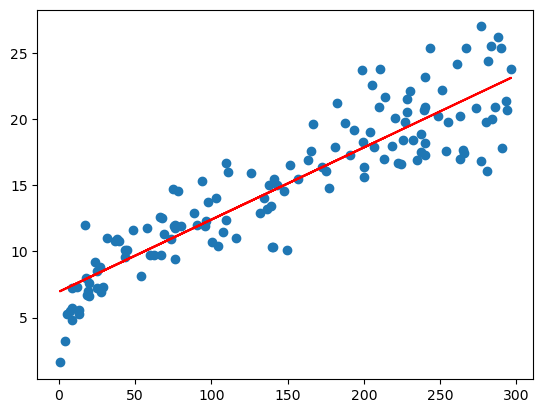

In [21]:
# Checking

plt.scatter(X_train, y_train)
#plt.plot(X_train, 6.9487 + 0.0545 * X_train, 'r')
plt.plot(X_train, y_train_pred, 'r')
plt.show()

# Step 3. Residual Analysis

In [23]:
# error = f(y_train, y_train_pred)

In [24]:
res = y_train - y_train_pred

C:\Users\andhondi\AppData\Local\Temp\ipykernel_23476\3503568905.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


Text(0.5, 1.0, 'Resisdual Plot')

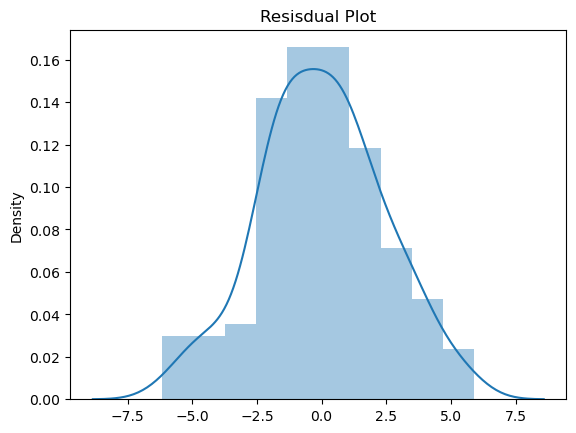

In [25]:
# Plot the residuals

plt.figure()
sns.distplot(res)
plt.title("Resisdual Plot")

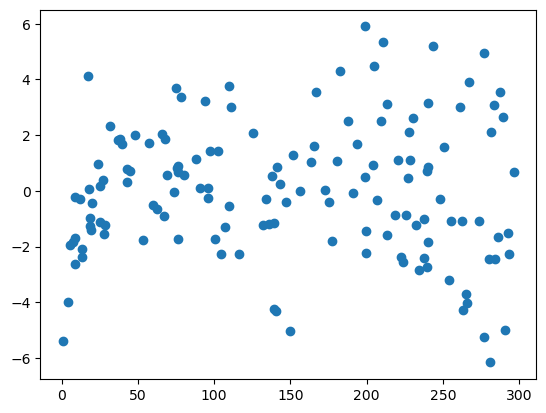

In [26]:
# Look for patterns in residuals (we should not be able to identify)

plt.scatter(X_train, res)
plt.show()

# Step 4: Prediction and Evaluation on the Test Set

In [28]:
# Predictions on the test set (y_test_pred)
# evaluate the model, r-squared, on the test

In [29]:
# Add a const/intercept to test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

# Pred on test

y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [30]:
# evaluate the model, r-squared, on the test
# r-squared

r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7921031601245659

In [31]:
# r2 on train set

r2_score(y_true=y_train, y_pred=y_train_pred)

0.8157933136480389

In [32]:
# mean_squared_error

mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

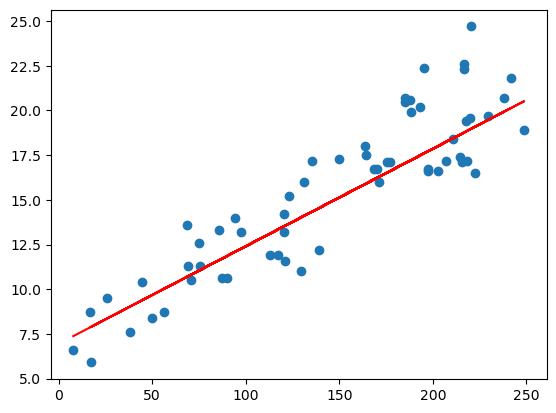

In [33]:
# Plot the graph


plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Linear Regression Using `sklearn`

In [35]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [36]:
# Shape of X_train

X_train.shape

(140,)

In [37]:
# Reshape the X_trian to (n, 1)

X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [38]:
# Steps in sklearn model building

# 1. Create an object for linear regression

lm = LinearRegression()

# 2. Fit the model

lm.fit(X_train_lm, y_train)

LinearRegression()

In [39]:
# 3. See the params, make predictions (train, test)

print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.948683200001357


In [40]:
# Make predictions

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [41]:
# 4. Evaluate (r2, ets..)

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
